<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Gestión de Outliers

AutoRenew, la empresa líder en la venta de coches de segunda mano, sigue adelante con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Este modelo es clave para mejorar las estrategias de ventas, marketing y optimización del inventario de la empresa. Ya has realizado un análisis exploratorio inicial y gestionado los valores nulos en el conjunto de datos. Ahora, es el momento de abordar otro aspecto crucial del preprocesamiento: la **gestión de outliers**.

En este laboratorio, te enfocarás en identificar y gestionar los outliers (valores atípicos) presentes en el conjunto de datos. Los outliers pueden distorsionar los resultados de un análisis y afectar negativamente el rendimiento de los modelos predictivos, por lo que es fundamental tratarlos adecuadamente antes de proceder con las siguientes fases del proyecto.


**Instrucciones:**

1. **Identificación de Outliers:** Explora las columnas clave del conjunto de datos (como `price`, `powerCV`, `kilometer`, etc.) para identificar posibles outliers. Utiliza gráficos como diagramas de caja (boxplots) y análisis estadísticos para detectar valores que se desvíen significativamente del resto de los datos.

2. **Análisis de Outliers:** Una vez identificados, analiza los outliers para determinar si son errores de datos, valores extremos válidos o resultados de condiciones específicas que deben ser tenidos en cuenta. Considera el contexto de cada columna al evaluar la relevancia de estos valores atípicos.

3. **Gestión de Outliers:** Decide la estrategia más adecuada para manejar los outliers. Esto podría incluir la eliminación de los outliers, la transformación de los datos, o la aplicación de técnicas de imputación. Justifica tu elección basándote en cómo los outliers podrían afectar el modelo predictivo.

**Nota:** Recuerda que este laboratorio es parte de una serie de actividades en las que utilizarás el mismo conjunto de datos a lo largo de la semana. Documenta cuidadosamente los pasos que sigas para que puedas referirte a ellos en las próximas etapas del proyecto.


In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("../")
from src import soporte_outliers as so

In [3]:
df = pd.read_csv("../data/datos_estandarizados.csv", index_col=0)

In [4]:
df_interesante = df.drop(["powerCV_knn", "powerCV_robust", "powerCV", "powerCV_mm", "powerCV_norm", "Unnamed: 0", "nrOfPictures"], axis=1)

In [5]:
df_interesante.to_csv("../data/datos_est_int.csv")

In [6]:
gestor_unicos = so.GestionOutliersUnivariados(df_interesante)
gestor_multiples = so.GestionOutliersMultivariados(df_interesante)

In [7]:
df_interesante["monthOfRegistration"] = df_interesante["monthOfRegistration"].astype("O")

1. **Identificación de Outliers:** Explora las columnas clave del conjunto de datos (como `price`, `powerCV`, `kilometer`, etc.) para identificar posibles outliers. Utiliza gráficos como diagramas de caja (boxplots) y análisis estadísticos para detectar valores que se desvíen significativamente del resto de los datos.

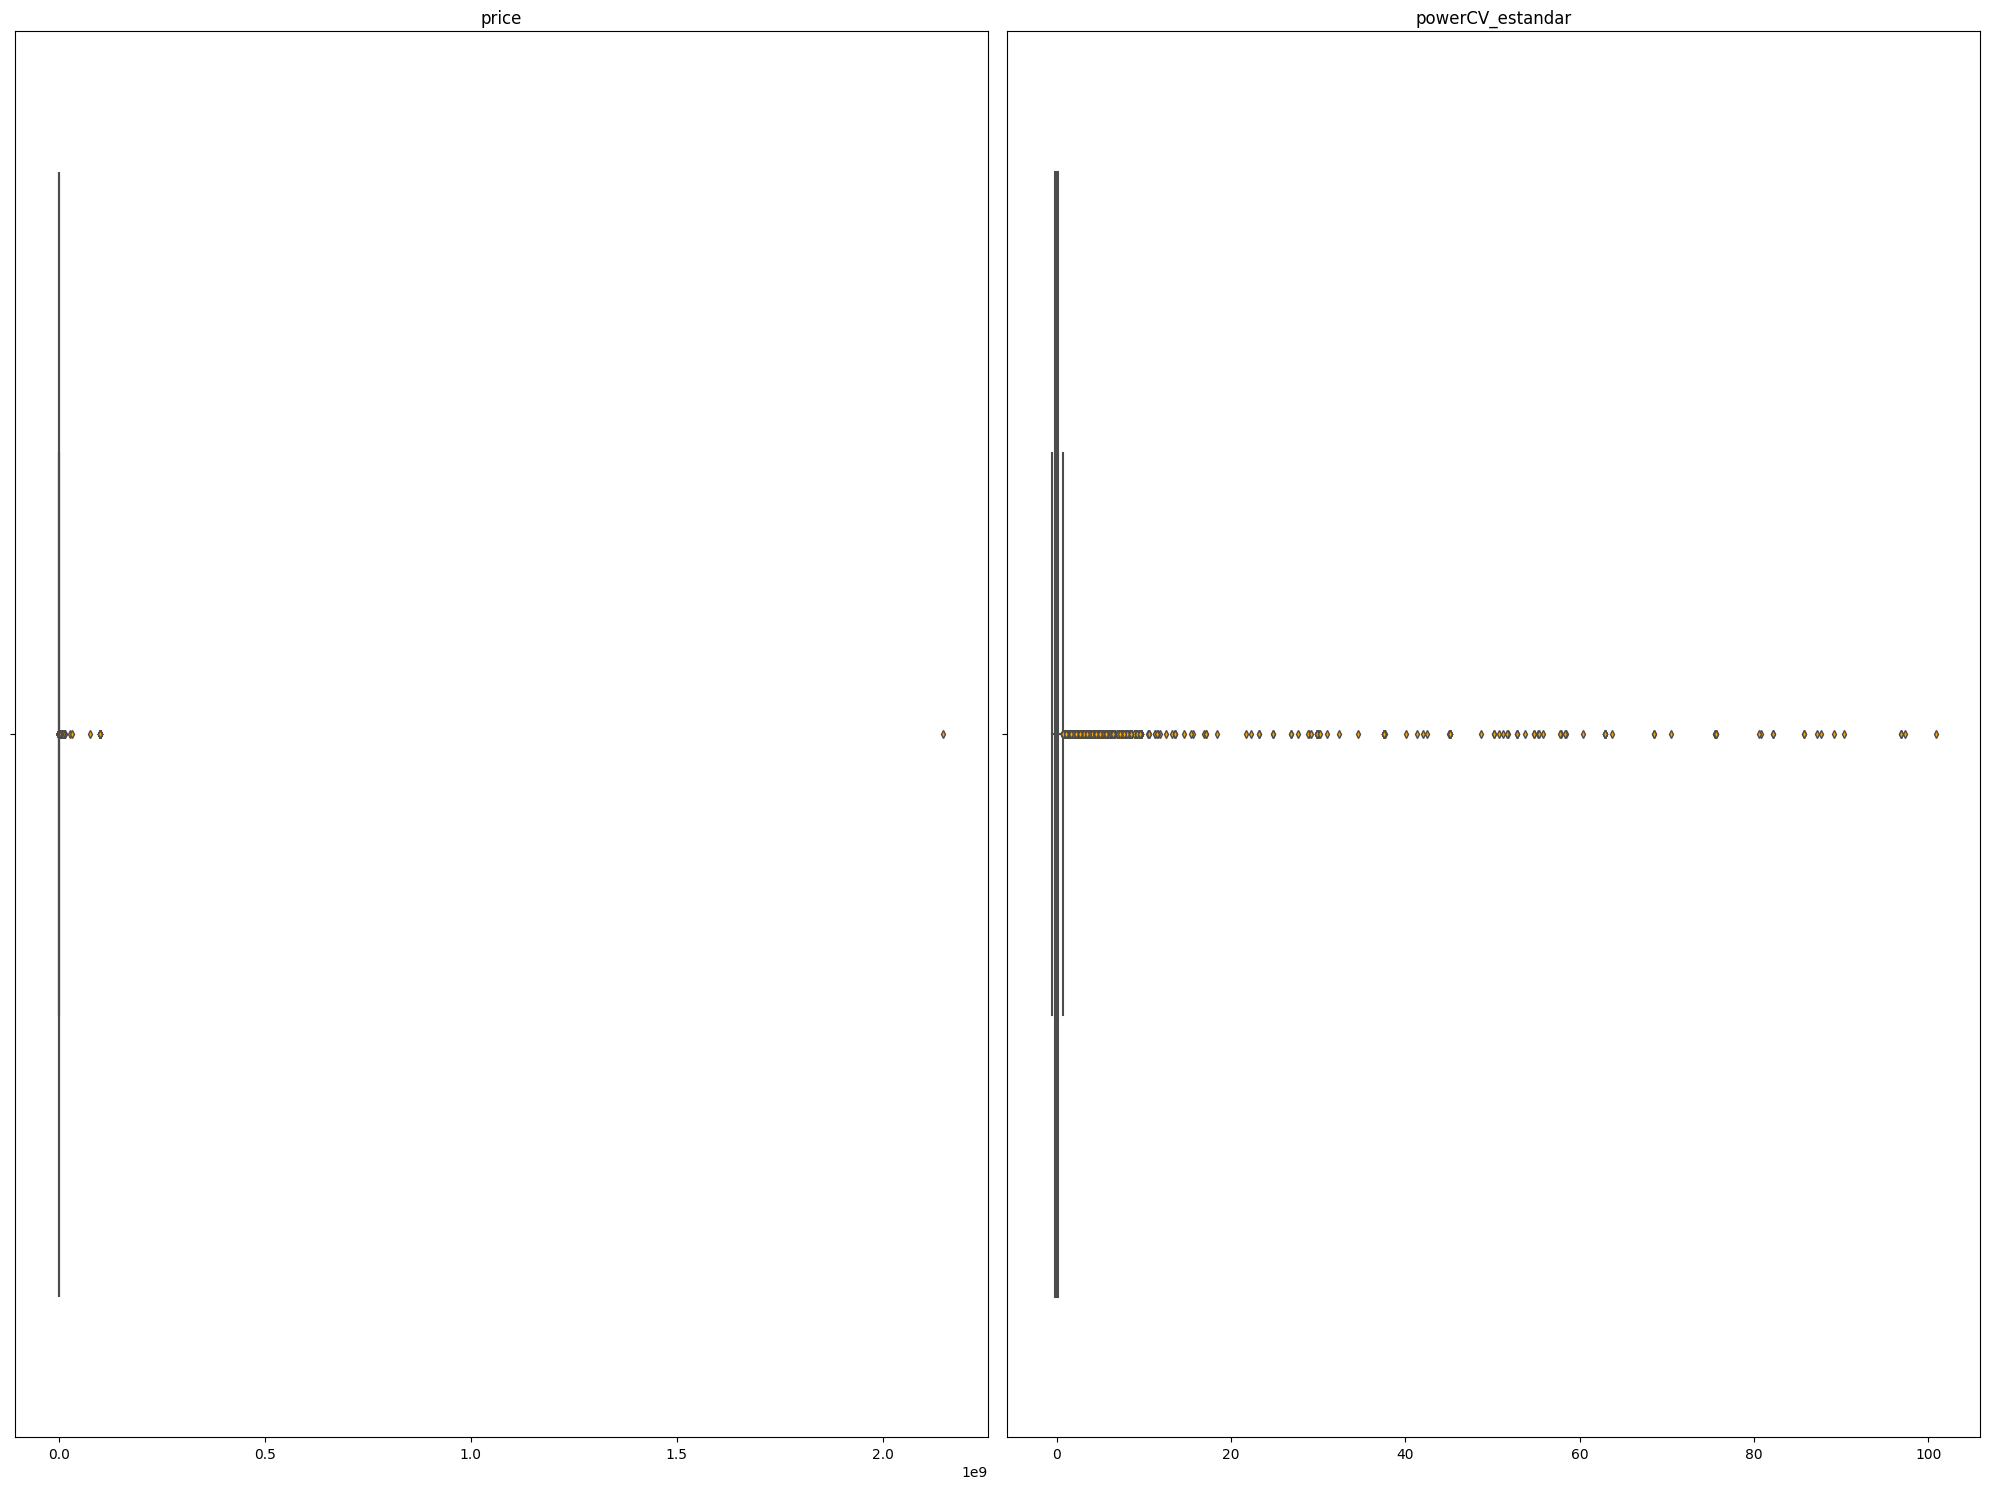

In [8]:
gestor_unicos.visualizar_outliers_univariados()

In [9]:
outliers_iqr = gestor_unicos.detectar_outliers_iqr()

La cantidad de outliers que tenemos para la columna PRICE es 26903
La cantidad de outliers que tenemos para la columna POWERCV_ESTANDAR es 10327


In [10]:
df_interesante.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'powerCV_estandar'],
      dtype='object')

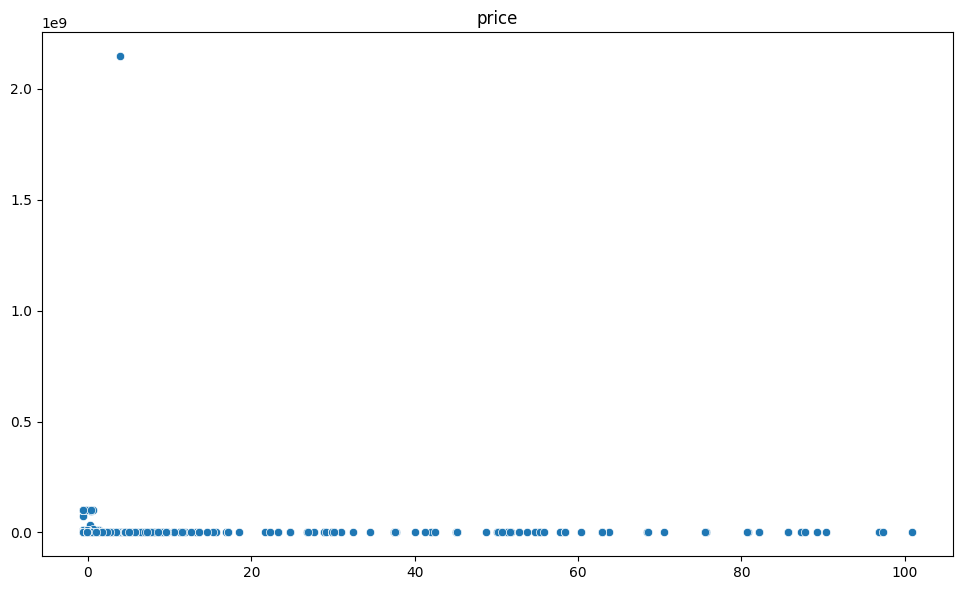

In [11]:
gestor_multiples.visualizar_outliers_bivariados("powerCV_estandar", tamano_grafica=(19,6))

2. **Análisis de Outliers:** Una vez identificados, analiza los outliers para determinar si son errores de datos, valores extremos válidos o resultados de condiciones específicas que deben ser tenidos en cuenta. Considera el contexto de cada columna al evaluar la relevancia de estos valores atípicos.

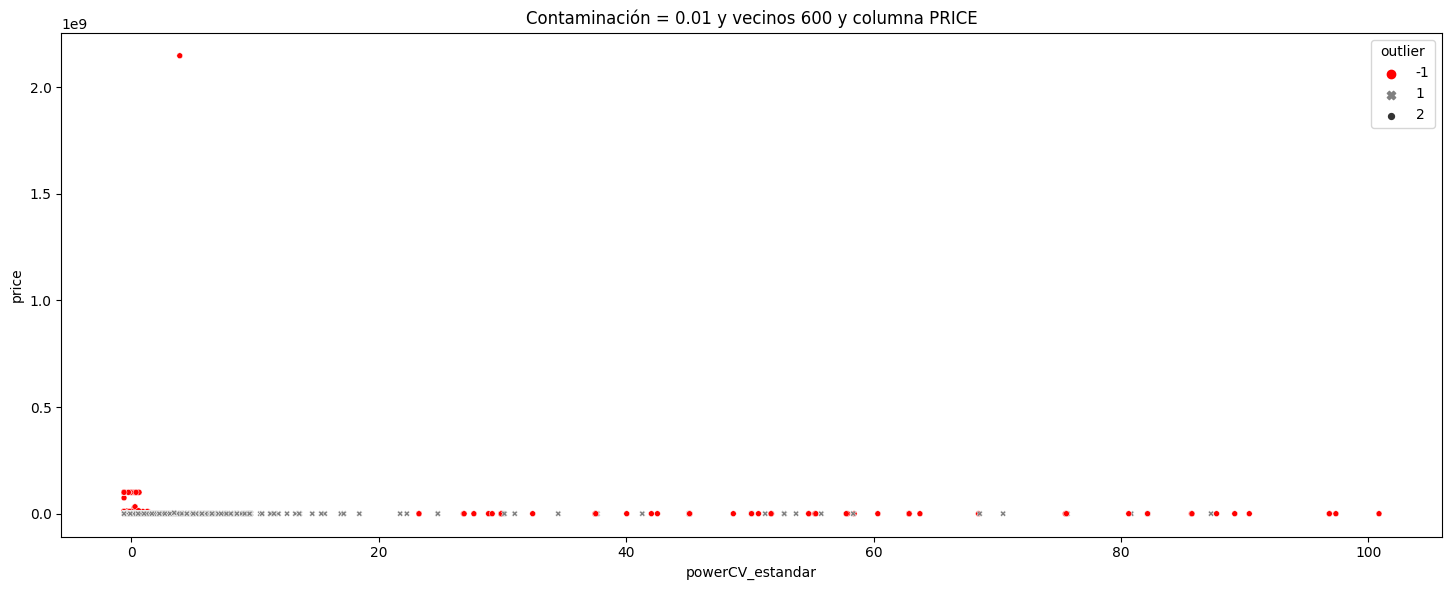

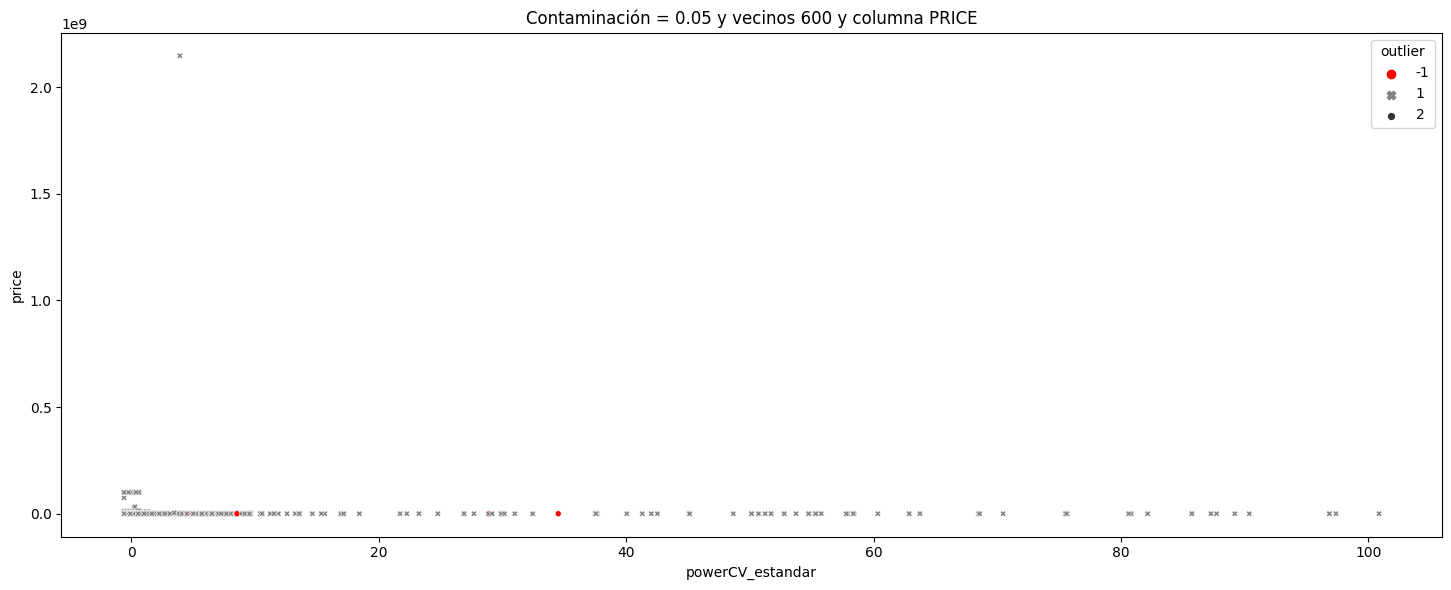

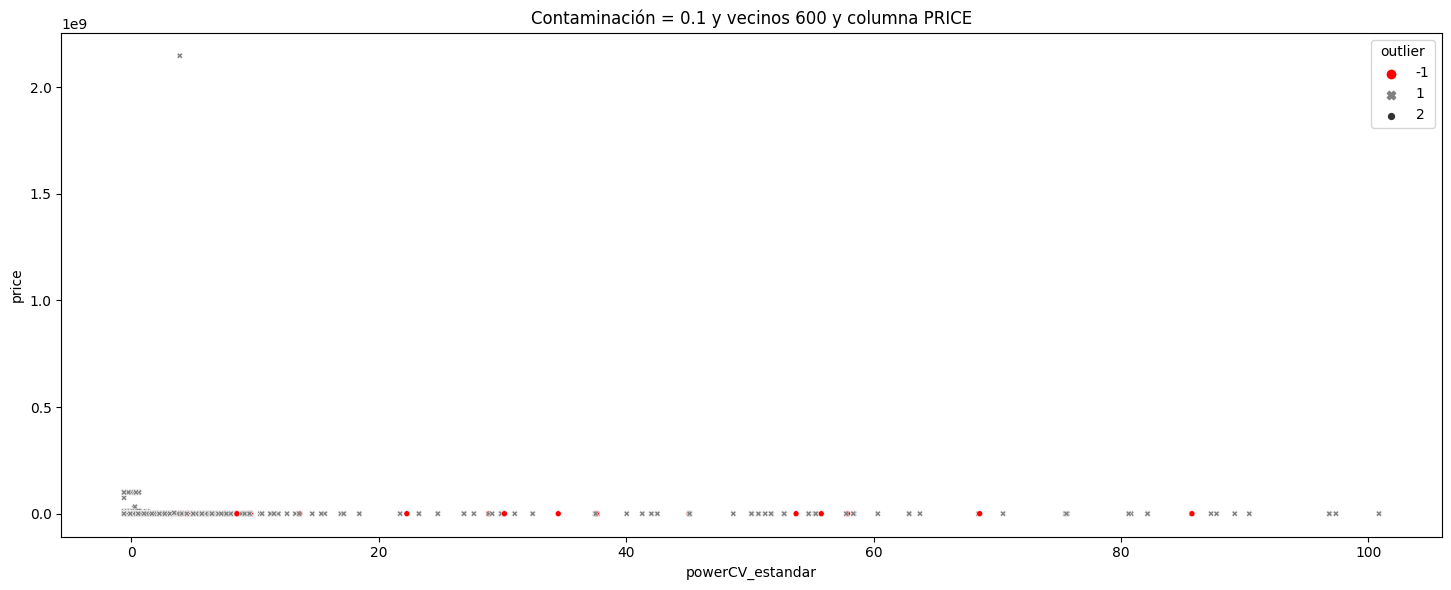

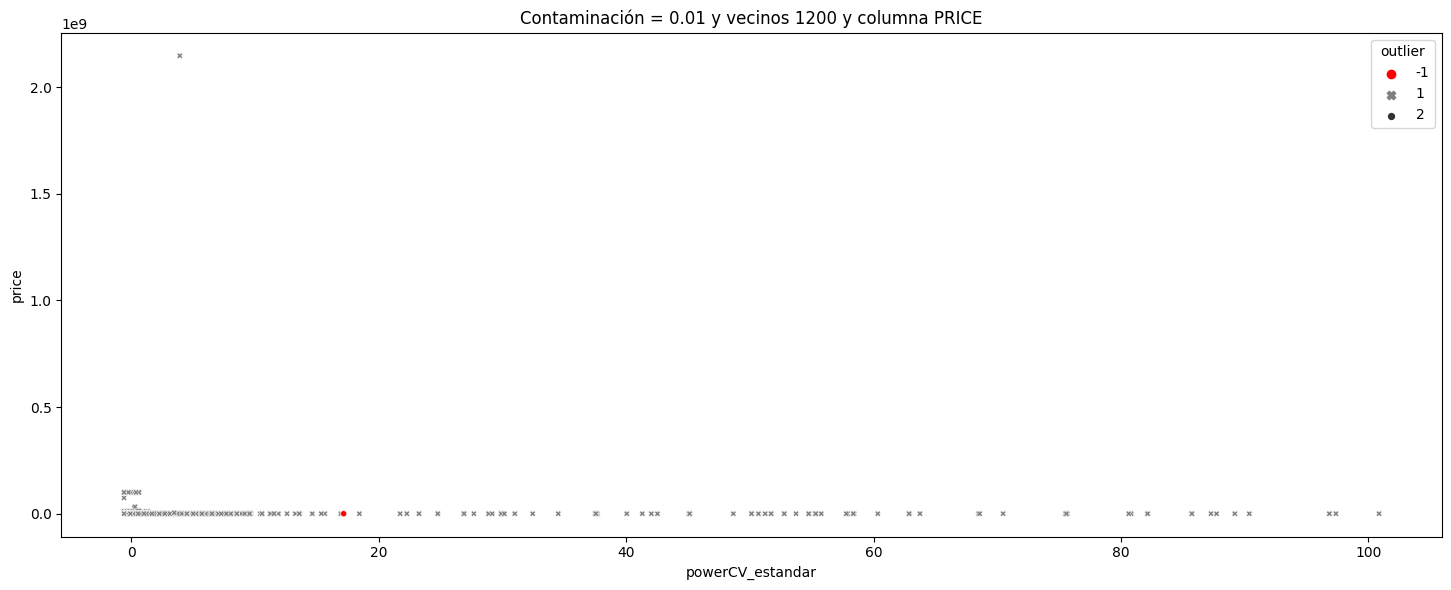

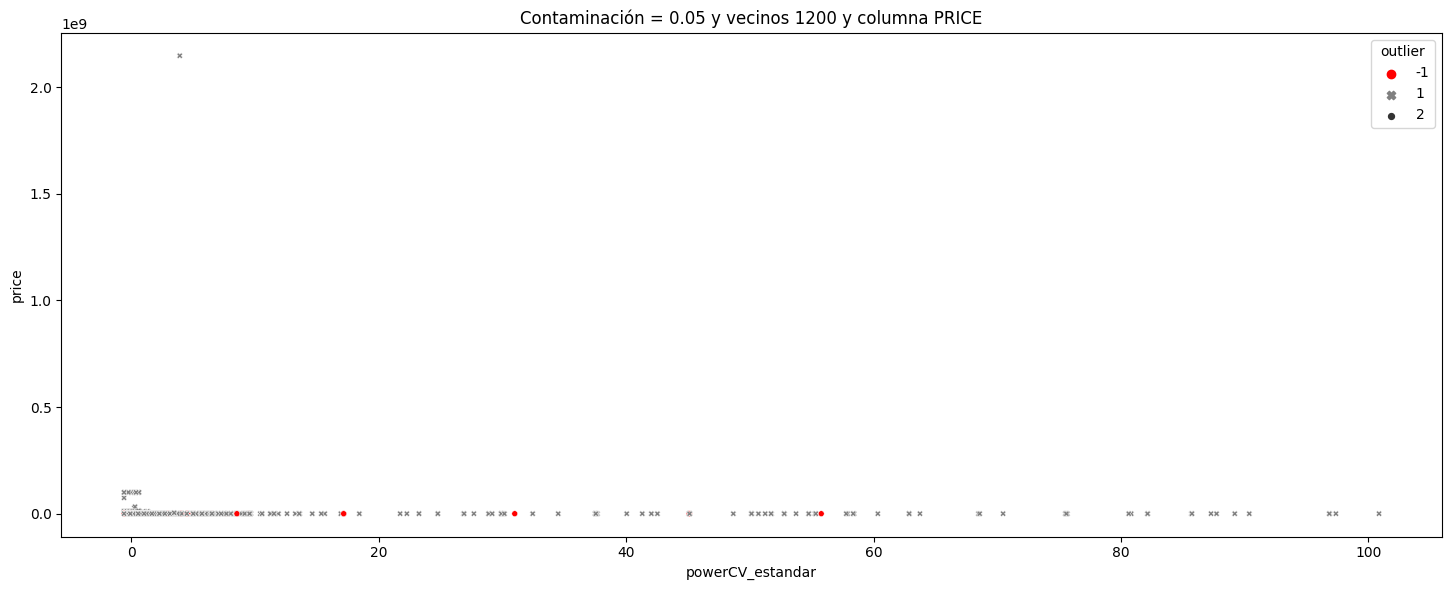

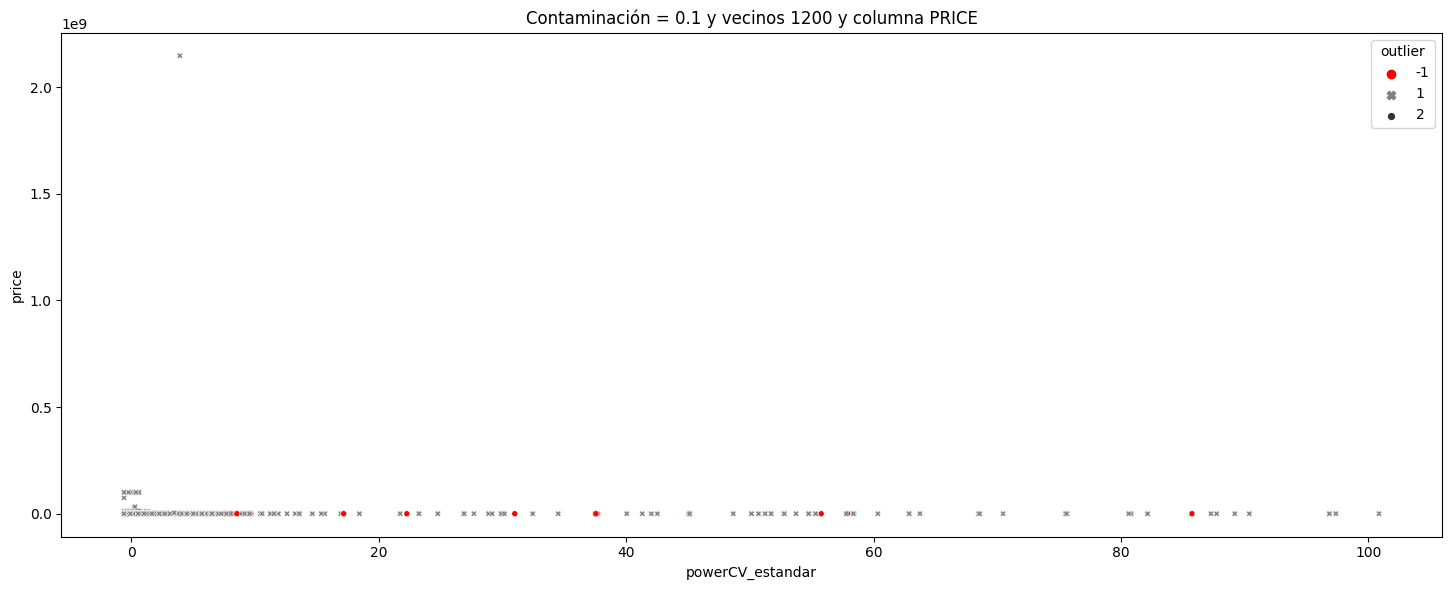

In [12]:
gestor_multiples.explorar_outliers_lof("powerCV_estandar",tamaño_grafica=(29,6))

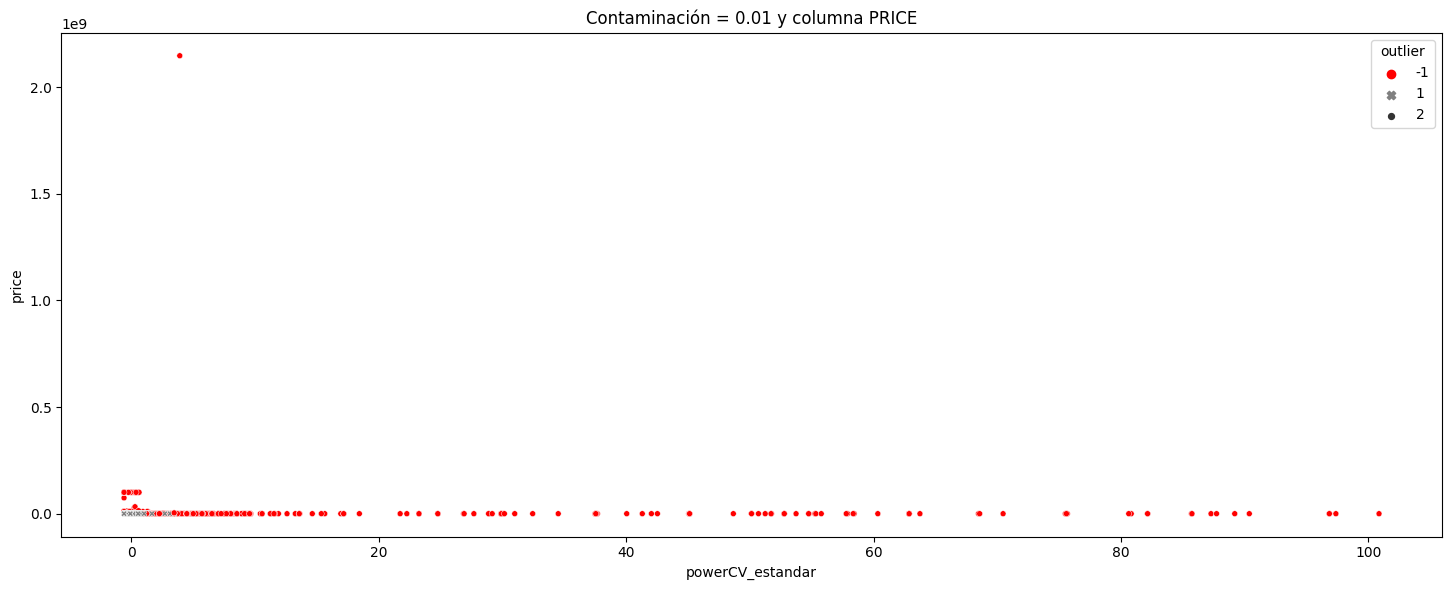

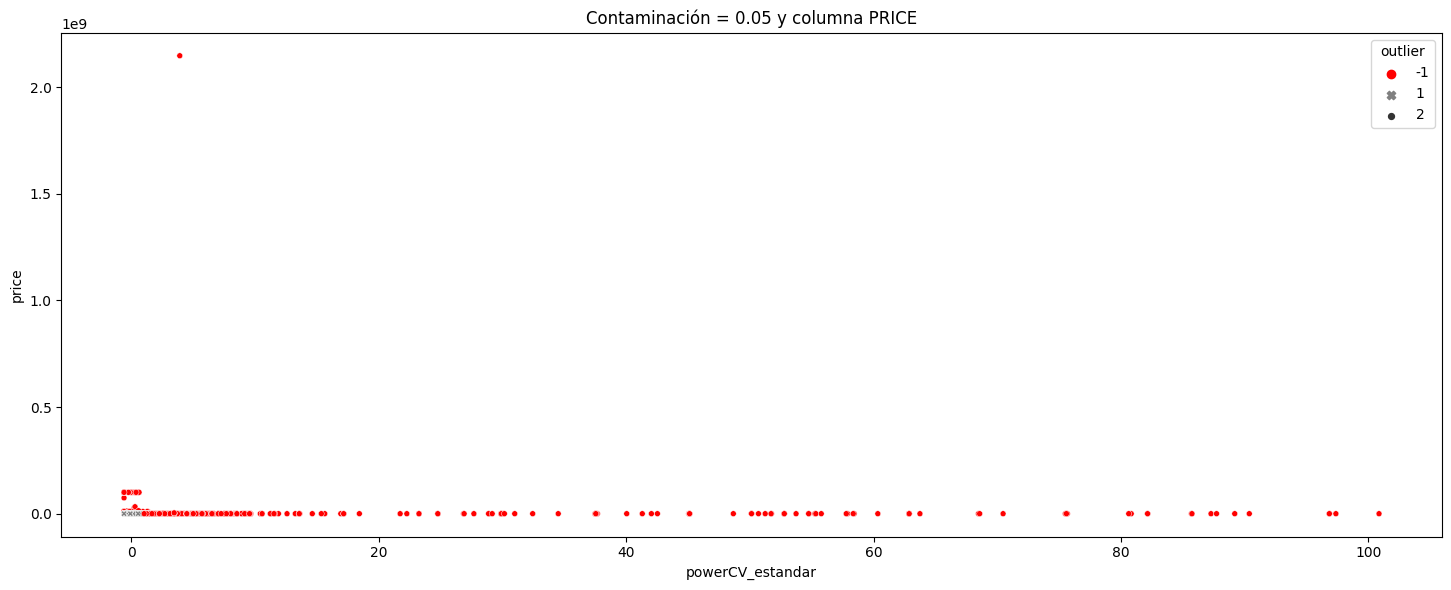

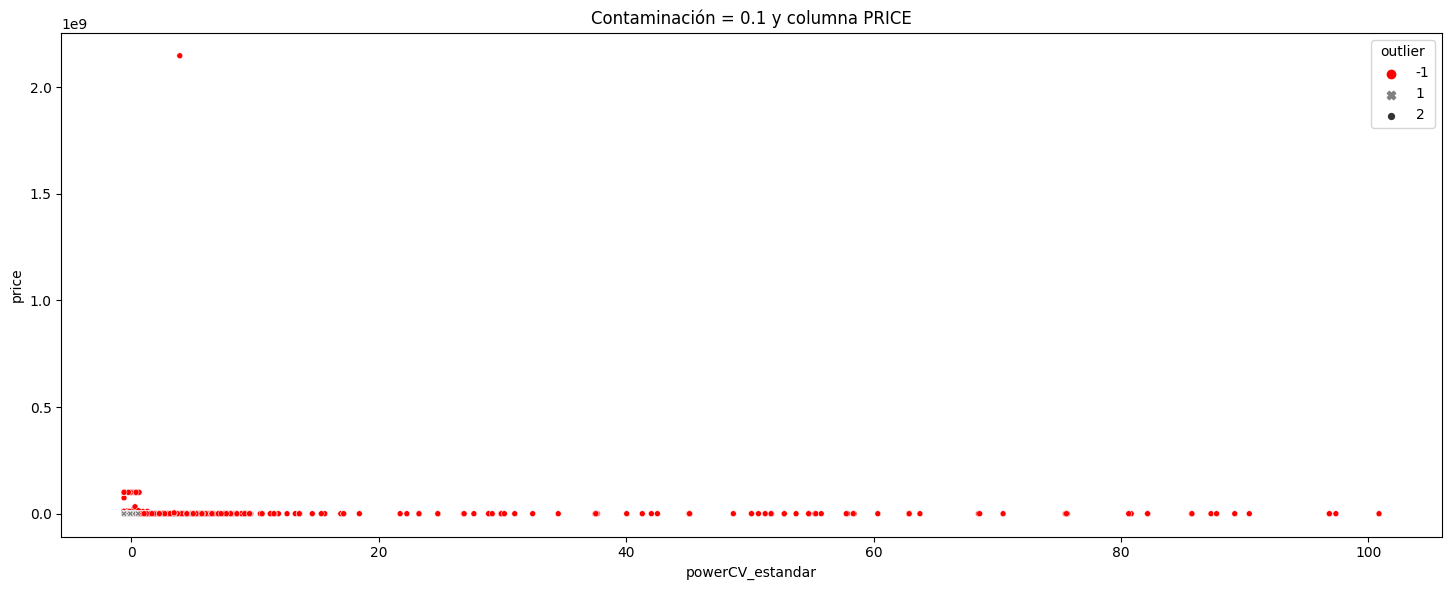

In [8]:
gestor_multiples.explorar_outliers_if("powerCV_estandar", tamaño_grafica=(29, 6))

Los datos analizados con los métodos, me indican que isolation forest son descorcentates, ya que hay demasiados outliers, por ello creo que el metodo lof, nos da unos datos un poco mas verosimiles

3. **Gestión de Outliers:** Decide la estrategia más adecuada para manejar los outliers. Esto podría incluir la eliminación de los outliers, la transformación de los datos, o la aplicación de técnicas de imputación. Justifica tu elección basándote en cómo los outliers podrían afectar el modelo predictivo.

In [8]:
df_interesante_final = gestor_multiples.detectar_outliers_lof(6,contaminacion=0.05)
df_interesante_final.head() 

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,powerCV_estandar,outlier
0,private,offer,480,test,Unknown,milnovecientos 90,manually,0,petrol,volkswagen,Unknown,-0.589563,1
1,private,offer,18300,test,coupe,dos mil 10,manually,5,diesel,audi,yes,0.372223,1
2,private,offer,9800,test,suv,dos mil 0,automatic,8,diesel,jeep,Unknown,0.238498,1
3,private,offer,1500,test,small car,dos mil 0,manually,6,petrol,volkswagen,no,-0.208963,1
4,private,offer,3600,test,small car,dos mil 0,manually,7,diesel,skoda,no,-0.239823,1


In [10]:
df_interesante_final_interesante = gestor_multiples.imputar_outliers(data = df_interesante_final, metodo = "mediana")
df_interesante_final_interesante.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,powerCV_estandar
0,private,offer,480,test,Unknown,milnovecientos 90,manually,0,petrol,volkswagen,Unknown,-0.589563
1,private,offer,18300,test,coupe,dos mil 10,manually,5,diesel,audi,yes,0.372223
2,private,offer,9800,test,suv,dos mil 0,automatic,8,diesel,jeep,Unknown,0.238498
3,private,offer,1500,test,small car,dos mil 0,manually,6,petrol,volkswagen,no,-0.208963
4,private,offer,3600,test,small car,dos mil 0,manually,7,diesel,skoda,no,-0.239823


In [11]:
df_interesante_final_interesante.to_csv("../data/conjunto_final_outliers.csv")